# <center>LIBRARIES AREA</center>

In [1]:
import pandas as pd
from IPython.display import display
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)

 # <center>IMPORT DATA AREA</center>
 
 <center>+  standardize</center>

In [2]:
raw_data = pd.read_csv('/Users/pedro/Desktop/Ironhack/Projects/Mini Project/data_mid_bootcamp_project_FIFA_MoneyBall/fifa21_male2.csv')

## Raw Data Visualization

In [3]:
raw_data

,ID,Name,Age,OVA,Nationality,Club,BOV,BP,Position,Player Photo,Club Logo,Flag Photo,POT,Team & Contract,Height,Weight,foot,Growth,Joined,Loan Date End,Value,Wage,Release Clause,Contract,Attacking,Crossing,Finishing,Heading Accuracy,Short Passing,Volleys,Skill,Dribbling,Curve,FK Accuracy,Long Passing,Ball Control,Movement,Acceleration,Sprint Speed,Agility,Reactions,Balance,Power,Shot Power,Jumping,Stamina,Strength,Long Shots,Mentality,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Defending,Marking,Standing Tackle,Sliding Tackle,Goalkeeping,GK Diving,GK Handling,GK Kicking,GK Positioning,GK Reflexes,Total Stats,Base Stats,W/F,SM,A/W,D/W,IR,PAC,SHO,PAS,DRI,DEF,PHY,Hits,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,GK,Gender
0,2,G. Pasquale,33,69,Italy,Udinese,71,LWB,LM,https://cdn.sofifa.com/players/000/002/16_120.png,https://cdn.sofifa.com/teams/55/light_60.png,https://cdn.sofifa.com/flags/it.png,69,Udinese 2008 ~ 2016,"6'0""",181lbs,Left,0,"Jul 1, 2008",NaN,€625K,€7K,€0,2008 ~ 2016,313,75,50,59,71,58.0,338,73,65.0,60,69,71,347,68,74,68.0,69,68.0,347,74,68.0,69,68,68,320,72,69.0,63.0,66.0,50,NaN,208,70,69,69.0,56,14,5,15,10,12,1929,408,3 ★,2★,Medium,High,2 ★,71,59,70,71,68,69,4,65+0,65+0,65+0,68+0,67+0,67+0,67+0,68+0,68+0,68+0,68+0,69+0,69+0,69+0,69+0,69+0,71+-2,70+-1,70+-1,70+-1,71+-2,70+-1,69+0,69+0,69+0,70+-1,17+0,Male
1,16,Luis García,37,71,Spain,KAS Eupen,70,CM,CM CAM CDM,https://cdn.sofifa.com/players/000/016/19_120.png,https://cdn.sofifa.com/teams/2013/light_60.png,https://cdn.sofifa.com/flags/es.png,71,KAS Eupen 2014 ~ 2019,"5'10""",143lbs,Right,0,"Jul 19, 2014",NaN,€600K,€7K,€1.1M,2014 ~ 2019,337,68,64,61,76,68.0,369,69,79.0,79,71,71,305,56,50,62.0,65,72.0,324,75,54.0,64,60,71,362,71,71.0,72.0,73.0,75,79.0,153,70,43,40.0,56,9,12,13,11,11,1906,385,4 ★,3★,Medium,Medium,1 ★,53,69,73,69,58,63,4,67+1,67+1,67+1,67+0,68+0,68+0,68+0,67+0,70+1,70+1,70+1,68+1,70+1,70+1,70+1,68+1,62+1,66+1,66+1,66+1,62+1,60+1,60+1,60+1,60+1,60+1,17+1,Male
2,27,J. Cole,33,71,England,Coventry City,71,CAM,CAM RM RW LM,https://cdn.sofifa.com/players/000/027/16_120.png,https://cdn.sofifa.com/teams/1800/light_60.png,https://cdn.sofifa.com/flags/gb-eng.png,71,Coventry City 2016 ~ 2020,"5'9""",161lbs,Right,0,"Jan 7, 2016",NaN,€1.1M,€15K,€0,2016 ~ 2020,337,80,64,41,77,75.0,387,79,84.0,77,69,78,295,48,42,71.0,59,75.0,284,72,58.0,29,56,69,317,69,39.0,69.0,74.0,66,NaN,99,35,34,30.0,51,9,6,13,16,7,1770,354,4 ★,4★,Medium,Low,2 ★,45,68,76,77,36,52,11,64+0,64+0,64+0,70+0,69+0,69+0,69+0,70+0,71+0,71+0,71+0,68+0,66+0,66+0,66+0,68+0,52+0,54+0,54+0,54+0,52+0,47+0,46+0,46+0,46+0,47+0,15+0,Male
3,36,D. Yorke,36,68,Trinidad &amp; Tobago,Sunderland,70,ST,NaN,https://cdn.sofifa.com/players/000/036/09_120.png,https://cdn.sofifa.com/teams/106/light_60.png,https://cdn.sofifa.com/flags/tt.png,82,Sunderland 2009,"5'11""",165lbs,Right,14,NaN,NaN,€0,€0,€0,2009,264,54,70,60,80,NaN,255,68,NaN,46,64,77,176,59,62,NaN,55,NaN,239,63,NaN,51,66,59,271,59,70.0,72.0,NaN,70,NaN,75,34,41,NaN,68,5,21,64,21,21,1348,369,3 ★,1★,NaN,NaN,1 ★,61,66,66,69,47,60,3,67+0,67+0,67+0,66+0,67+0,67+0,67+0,66+0,70+0,70+0,70+0,66+0,68+0,68+0,68+0,66+0,56+0,65+0,65+0,65+0,56+0,57+0,51+0,51+0,51+0,57+0,22+0,Male
4,41,Iniesta,36,81,Spain,Vissel Kobe,82,CAM,CM CAM,https://cdn.sofifa.com/players/000/041/20_120.png,https://cdn.sofifa.com/teams/101146/light_60.png,https://cdn.sofifa.com/flags/es.png,81,Vissel Kobe 2018 ~ 2021,"5'7""",150lbs,Right,0,"Jul 16, 2018",NaN,€5.5M,€12K,€7.2M,2018 ~ 2021,367,75,69,54,90,79.0,408,85,80.0,70,83,90,346,61,56,79.0,75,75.0,297,67,40.0,58,62,70,370,58,70.0,78.0,93.0,71,89.0,181,68,57,56.0,45,6,13,6,13,7,2014,420,4 ★,4★,High,Medium,4 ★,58,70,85,85,63,59,149,72+3,72+3,72+3,79+0,79+0,79+0,79+0,79+0,82+-1,82+-1,82+-1,79+2,81+0,81+0,81+0,79+2,70+3,73+3,73+3,73+3,70+3,67+3,64+3,64+3,64+3,67+3,17+3,Male
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,

In [4]:
j=0
for i in raw_data.isna().sum():
    if i != 0:
        j=j+1
print("Number of columns with NaN's:",j)

Number of columns with NaN's: 17


## Coments on: Imported Data

In <b>raw_data</b>:
- 17 columns have NaNs;
- Column names aren't standerdized.

# <center>DATA CLEANING AREA</center>

In [5]:
raw_data.columns = [raw_data.columns[i].lower().replace(' ', '_') for i in range(len(raw_data.columns))]

In [6]:
raw_data= raw_data.set_index('id')

In [7]:
j=0
for i in raw_data.columns: j=j+1; print(j,'[',i,']', raw_data.isna().sum()[i])

1 [ name ] 0
2 [ age ] 0
3 [ ova ] 0
4 [ nationality ] 0
5 [ club ] 23
6 [ bov ] 0
7 [ bp ] 0
8 [ position ] 413
9 [ player_photo ] 0
10 [ club_logo ] 23
11 [ flag_photo ] 0
12 [ pot ] 0
13 [ team_&_contract ] 0
14 [ height ] 0
15 [ weight ] 0
16 [ foot ] 0
17 [ growth ] 0
18 [ joined ] 58
19 [ loan_date_end ] 16215
20 [ value ] 0
21 [ wage ] 0
22 [ release_clause ] 0
23 [ contract ] 0
24 [ attacking ] 0
25 [ crossing ] 0
26 [ finishing ] 0
27 [ heading_accuracy ] 0
28 [ short_passing ] 0
29 [ volleys ] 58
30 [ skill ] 0
31 [ dribbling ] 0
32 [ curve ] 58
33 [ fk_accuracy ] 0
34 [ long_passing ] 0
35 [ ball_control ] 0
36 [ movement ] 0
37 [ acceleration ] 0
38 [ sprint_speed ] 0
39 [ agility ] 58
40 [ reactions ] 0
41 [ balance ] 58
42 [ power ] 0
43 [ shot_power ] 0
44 [ jumping ] 58
45 [ stamina ] 0
46 [ strength ] 0
47 [ long_shots ] 0
48 [ mentality ] 0
49 [ aggression ] 0
50 [ interceptions ] 7
51 [ positioning ] 7
52 [ vision ] 58
53 [ penalties ] 0
54 [ composure ] 423
55 [ def

In [8]:
del raw_data['loan_date_end']

In [9]:
data=raw_data.dropna()

### <center>DEFINE FUNCTIONS AREA</center>

In [10]:
#This function converts the height in feet and inches to meters
def ft_inch_to_meter(x):
    x=x.replace('"','').split("'")
    x[0]=float(x[0])
    x[1]=float(x[1])
    x = ((x[0]*0.3048) + (x[1]*0.0254))
    x = round(x,2)
    return x

In [11]:
#This function converts the weight in lbs to kgs
def lbs_to_kg(x):
    x = x.replace('lbs','')
    x = int(x)
    x = round(x*0.45359237,2)
    return x

In [12]:
#This function calculates the square of the height
def h_2(h):
    return round(1/(h*h),2)

In [13]:
#This function calculates the BMI (body mass index)
def bmi(w,h_2):
    return round(w*(h_2),2)

In [14]:
#This function turns the wage values to numbers
def wage_to_number(x):
    x=x.replace('€','').replace('K','000')
    x=int(x)
    return x

### <center>CONVERTION AREA</center>

In [15]:
# Here we're converting the values of weight to kgs in data
data['weight']=data['weight'].apply(lbs_to_kg)

In [16]:
# Here we're converting the values of height to meters in data
data['height']=data['height'].apply(ft_inch_to_meter)

In [17]:
# Here we're converting the values of height to meters in data
data['inverse_height_squared']=data['height'].apply(h_2)

In [18]:
# Here we're converting the wage values to numbers
data['wage']=data['wage'].apply(wage_to_number)

### <center>CALCULATION AREA</center>

In [19]:
data['bmi'] = data.apply(lambda x: bmi(x['weight'], x['inverse_height_squared']), axis=1)

In [20]:
data

,name,age,ova,nationality,club,bov,bp,position,player_photo,club_logo,flag_photo,pot,team_&_contract,height,weight,foot,growth,joined,value,wage,release_clause,contract,attacking,crossing,finishing,heading_accuracy,short_passing,volleys,skill,dribbling,curve,fk_accuracy,long_passing,ball_control,movement,acceleration,sprint_speed,agility,reactions,balance,power,shot_power,jumping,stamina,strength,long_shots,mentality,aggression,interceptions,positioning,vision,penalties,composure,defending,marking,standing_tackle,sliding_tackle,goalkeeping,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes,total_stats,base_stats,w/f,sm,a/w,d/w,ir,pac,sho,pas,dri,def,phy,hits,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,gk,gender,inverse_height_squared,bmi
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
16,Luis García,37,71,Spain,KAS Eupen,70,CM,CM CAM CDM,https://cdn.sofifa.com/players/000/016/19_120.png,https://cdn.sofifa.com/teams/2013/light_60.png,https://cdn.sofifa.com/flags/es.png,71,KAS Eupen 2014 ~ 2019,1.78,64.86,Right,0,"Jul 19, 2014",€600K,7000,€1.1M,2014 ~ 2019,337,68,64,61,76,68.0,369,69,79.0,79,71,71,305,56,50,62.0,65,72.0,324,75,54.0,64,60,71,362,71,71.0,72.0,73.0,75,79.0,153,70,43,40.0,56,9,12,13,11,11,1906,385,4 ★,3★,Medium,Medium,1 ★,53,69,73,69,58,63,4,67+1,67+1,67+1,67+0,68+0,68+0,68+0,67+0,70+1,70+1,70+1,68+1,70+1,70+1,70+1,68+1,62+1,66+1,66+1,66+1,62+1,60+1,60+1,60+1,60+1,60+1,17+1,Male,0.32,20.76
41,Iniesta,36,81,Spain,Vissel Kobe,82,CAM,CM CAM,https://cdn.sofifa.com/players/000/041/20_120.png,https://cdn.sofifa.com/teams/101146/light_60.png,https://cdn.sofifa.com/flags/es.png,81,Vissel Kobe 2018 ~ 2021,1.70,68.04,Right,0,"Jul 16, 2018",€5.5M,12000,€7.2M,2018 ~ 2021,367,75,69,54,90,79.0,408,85,80.0,70,83,90,346,61,56,79.0,75,75.0,297,67,40.0,58,62,70,370,58,70.0,78.0,93.0,71,89.0,181,68,57,56.0,45,6,13,6,13,7,2014,420,4 ★,4★,High,Medium,4 ★,58,70,85,85,63,59,149,72+3,72+3,72+3,79+0,79+0,79+0,79+0,79+0,82+-1,82+-1,82+-1,79+2,81+0,81+0,81+0,79+2,70+3,73+3,73+3,73+3,70+3,67+3,64+3,64+3,64+3,67+3,17+3,Male,0.35,23.81
80,E. Belözoğlu,38,77,Turkey,Fenerbahçe SK,77,CM,CM CDM,https://cdn.sofifa.com/players/000/080/20_120.png,https://cdn.sofifa.com/teams/326/light_60.png,https://cdn.sofifa.com/flags/tr.png,77,Fenerbahçe SK 2019 ~ 2020,1.70,72.12,Left,0,"Jul 2, 2019",€2.8M,44000,€5.3M,2019 ~ 2020,342,80,66,43,84,69.0,406,77,83.0,80,85,81,308,54,36,67.0,70,81.0,340,77,72.0,51,64,76,384,87,62.0,65.0,85.0,85,80.0,190,65,65,60.0,47,7,11,7,14,8,2017,403,4 ★,4★,Medium,Medium,2 ★,44,71,83,77,62,66,7,66+2,66+2,66+2,72+0,72+0,72+0,72+0,72+0,75+2,75+2,75+2,72+2,76+1,76+1,76+1,72+2,66+2,72+2,72+2,72+2,66+2,64+2,65+2,65+2,65+2,64+2,16+2,Male,0.35,25.24
330,R. Keane,35,80,Republic of Ireland,LA Galaxy,81,CF,ST,https://cdn.sofifa.com/players/000/330/17_120.png,https://cdn.sofifa.com/teams/697/light_60.png,https://cdn.sofifa.com/flags/ie.png,80,LA Galaxy 2011 ~ 2022,1.75,73.03,Right,0,"Aug 1, 2011",€5.5M,10000,€0,2011 ~ 2022,380,68,84,63,81,84.0,374,82,82.0,63,63,84,380,69,68,77.0,83,83.0,363,81,62.0,72,68,80,343,67,34.0,85.0,82.0,75,86.0,71,28,26,17.0,63,11,9,13,14,16,1974,407,4 ★,3★,High,Low,2 ★,68,82,75,82,31,69,10,79+1,79+1,79+1,79+0,81+-1,81+-1,81+-1,79+0,81+-1,81+-1,81+-1,78+1,74+1,74+1,74+1,78+1,57+1,57+1,57+1,57+1,57+1,52+1,47+1,47+1,47+1,52+1,20+1,Male,0.33,24.10
1179,G. Buffon,42,82,Italy,Juventus,82,GK,GK,https://cdn.sofifa.com/players/001/179/20_120.png,https://cdn.sofifa.com/teams/45/light_60.png,https://cdn.sofifa.com/flags/it.png,82,Juventus 2019 ~ 2021,1.93,92.08,Right,0,"Jul 4, 2019",€2.2M,41000,€3.6M,2019 ~ 2021,95,13,15,13,37,17.0,122,26,20.0,13,35,28,251,37,30,55.0,80,49.0,243,56,71.0,34,69,13,150,38,28.0,12.0,50.0,22,70.0,35,13,11,11.0,396,77,76,74,91,78,1292,429,2 ★,1★,Medium,Medium,4 ★,77,76,74,78,33,91,154,31+3,31+3,31+3,30+0,33+0,33+0,33+0,30+0,34+3,34+3,34+3,32+3,35+3,35+3,35+3,32+3,28+3,33+3,33+3,33+3,28+3

## Coments on: Data Cleaning


- Columns are now standardised (in lower case with "_" instead of spaces);
- The dataframe <b>raw_data</b> have a <b>column</b> named <b>Loan Date End</b> and it <b>has more than 16k NaN's</b>;
- We can not just <b>drop ALL the NaN's</b> or we'll <b>lose around  94.7%</b> of the data;
- 'Loan Date End' column has been droped;
- Then all the NaN's have been droped, this way we <b>preserved 95.0%</b> of the original dataset;
- The <b>data</b> dataframe <b>is the cleaned version</b> of the raw_data <b>and will be used from now on</b>;
- The values of height and weight were converted to SI (international system of units) in this case, meters and kilograms respectively;
- It was calculated and added a column named <b>bmi</b> (<b>B</b>ody <b>M</b>ass <b>I</b>ndex).

# <center>EDA AREA</center>

## Graphs of density

### Age

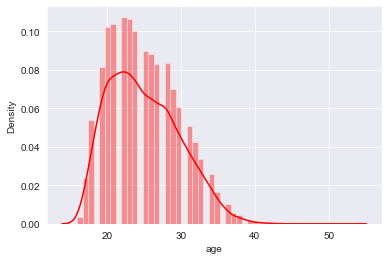

In [21]:
sns.set_style('darkgrid')
sns.distplot(data['age'],color='r')
plt.show()

### OVA

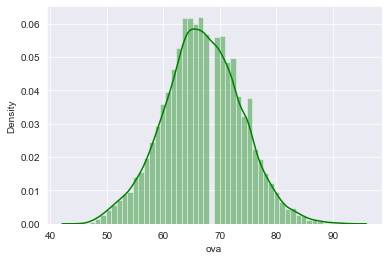

In [22]:
sns.set_style('darkgrid')
sns.distplot(data['ova'],color='g')
plt.show()

### BOV

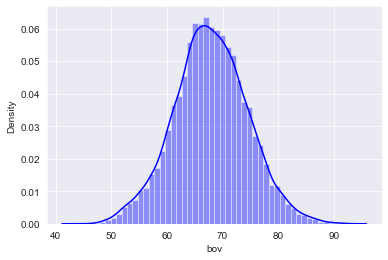

In [23]:
sns.set_style('darkgrid')
sns.distplot(data['bov'],color='b')
plt.show()

### Height in meters

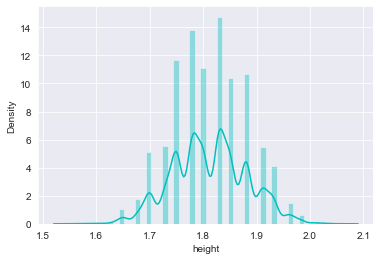

In [24]:
sns.set_style('darkgrid')
sns.distplot(data['height'],color='c')
plt.show()

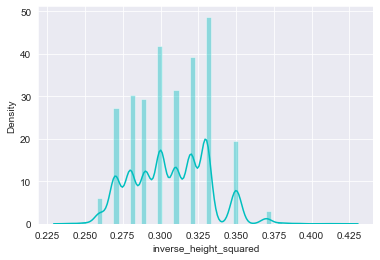

In [25]:
sns.set_style('darkgrid')
sns.distplot(data['inverse_height_squared'],color='c')
plt.show()

### Weight in kilograms

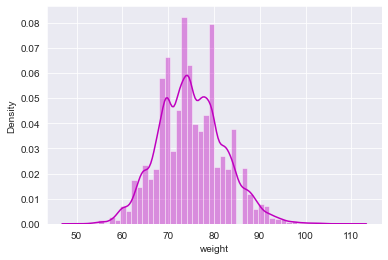

In [26]:
sns.set_style('darkgrid')
sns.distplot(data['weight'],color='m')
plt.show()

### Body Mass Index

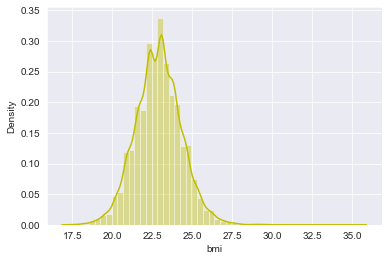

In [27]:
sns.set_style('darkgrid')
sns.distplot(data['bmi'],color='y')
plt.show()

### Wage

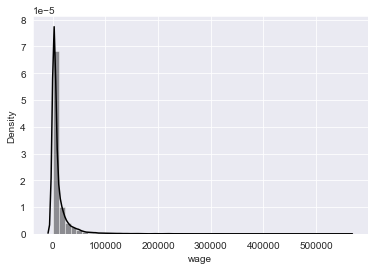

In [28]:
sns.set_style('darkgrid')
sns.distplot(data['wage'],color='k')
plt.show()

## Pair ploting

### Age x OVA

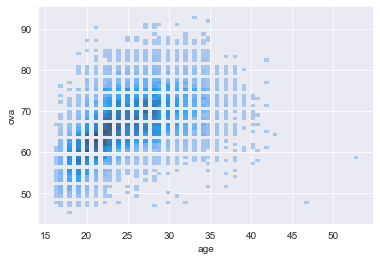

In [29]:
sns.set_style('darkgrid')
sns.histplot(data=data, x='age', y= 'ova')
plt.show()

### Age x BOV

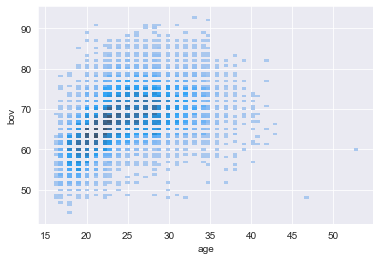

In [30]:
sns.set_style('darkgrid')
sns.histplot(data=data, x='age', y= 'bov')
plt.show()

### BOV x OVA

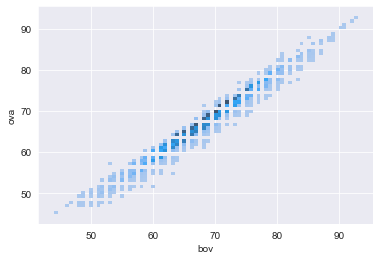

In [31]:
sns.set_style('darkgrid')
sns.histplot(data=data, x='bov', y= 'ova')
plt.show()

### Age x Height (in meters)

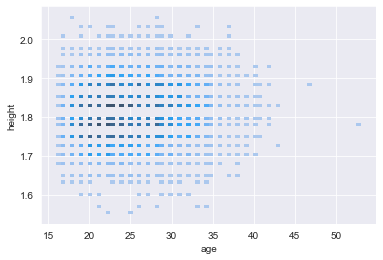

In [32]:
sns.set_style('darkgrid')
sns.histplot(data=data, x='age', y= 'height')
plt.show()

### Age x Weight (in kilograms)

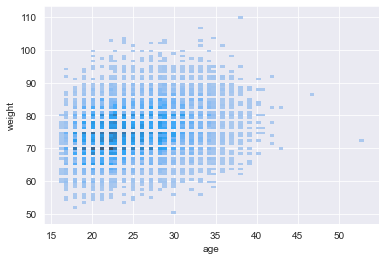

In [33]:
sns.set_style('darkgrid')
sns.histplot(data=data, x='age', y= 'weight')
plt.show()

### Age x Body Mass Index

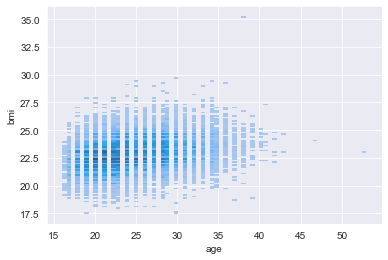

In [34]:
sns.set_style('darkgrid')
sns.histplot(data=data, x='age', y= 'bmi')
plt.show()

### OVA x Body Mass Index

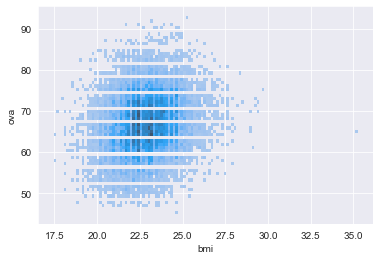

In [35]:
sns.set_style('darkgrid')
sns.histplot(data=data, x='bmi', y= 'ova')
plt.show()

### BOV x Body Mass Index

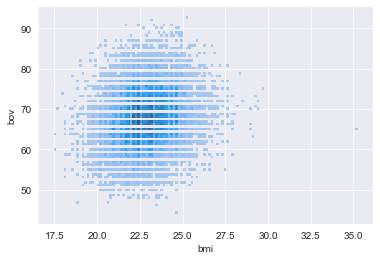

In [36]:
sns.set_style('darkgrid')
sns.histplot(data=data, x='bmi', y='bov')
plt.show()

### Zooming in the Wage graph

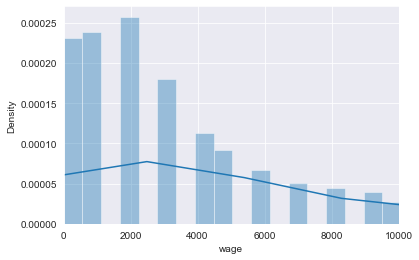

In [37]:
sns.set_style('darkgrid')
sns.distplot(data['wage'], bins=1000).set_xlim(-0,10000)
plt.show()

### Body Mass Index x  Wage (zoomed) 

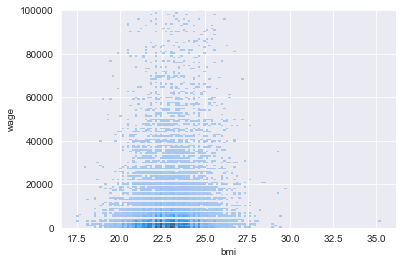

In [38]:
sns.set_style('darkgrid')
sns.histplot(data=data, x='bmi', y= 'wage').set_ylim(-0,100000)
plt.show()

### Wage (zoomed) x Body Mass Index

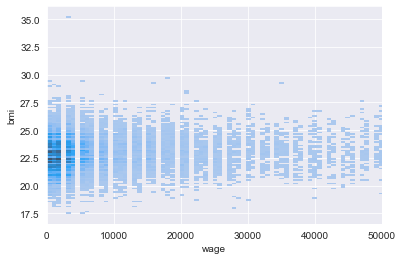

In [39]:
sns.set_style('darkgrid')
sns.histplot(data=data, x='wage', y= 'bmi').set_xlim(-0,50000)
plt.show()

### Reducing DataFrame to relevant columns for predicton + checking the type of data

In [71]:
df = data.loc[:, ['age','ova','bov','inverse_height_squared','height','weight','wage','bmi']]
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16414 entries, 16 to 259105
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   age                     16414 non-null  int64  
 1   ova                     16414 non-null  int64  
 2   bov                     16414 non-null  int64  
 3   inverse_height_squared  16414 non-null  float64
 4   height                  16414 non-null  float64
 5   weight                  16414 non-null  float64
 6   wage                    16414 non-null  int64  
 7   bmi                     16414 non-null  float64
dtypes: float64(4), int64(4)
memory usage: 1.6 MB


### Correlation Matrix

In [72]:
df_corr=df.corr()
df_corr

,age,ova,bov,inverse_height_squared,height,weight,wage,bmi
age,1.000000,0.524508,0.464624,-0.086144,0.086986,0.247823,0.207200,0.263534
ova,0.524508,1.000000,0.986274,-0.023622,0.023297,0.148864,0.595311,0.193936
bov,0.464624,0.986274,1.000000,-0.014754,0.013742,0.131541,0.595491,0.179399
inverse_height_squared,-0.086144,-0.023622,-0.014754,1.000000,-0.992294,-0.757858,-0.023558,0.136086
height,0.086986,0.023297,0.013742,-0.992294,1.000000,0.764786,0.023406,-0.122014
weight,0.247823,0.148864,0.131541,-0.757858,0.764786,1.000000,0.071482,0.536685
wage,0.207200,0.595311,0.595491,-0.023558,0.023406,0.071482,1.000000,0.077315
bmi,0.263534,0.193936,0.179399,0.136086,-0.122014,0.536685,0.077315,1.000000


### Heat Map

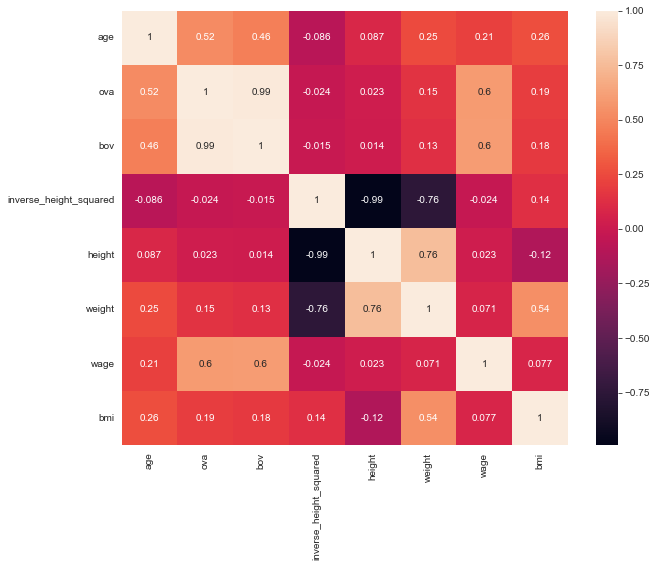

In [73]:
mask = np.zeros_like(df.corr())
fig, ax = plt.subplots(figsize=(10, 8))
ax = sns.heatmap(df.corr(), mask=mask, annot=True)
plt.show()

### Covariance Visualization

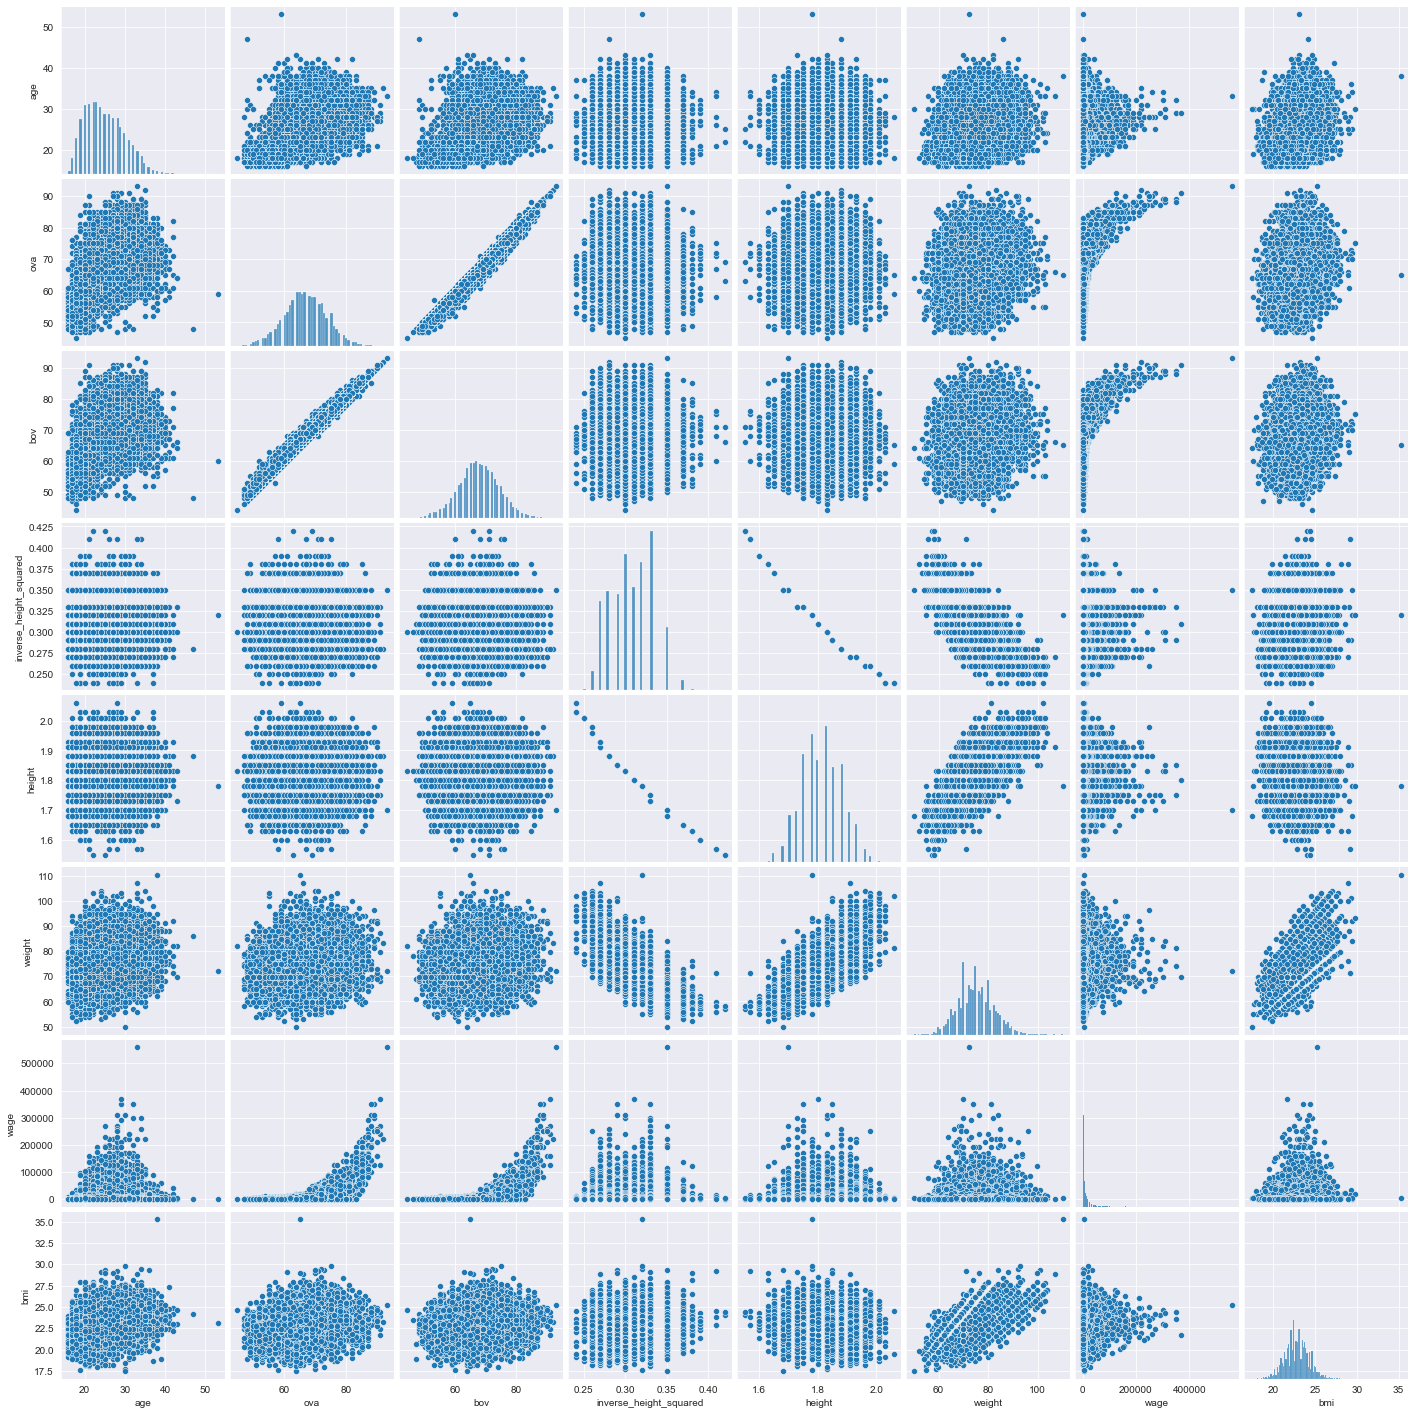

In [74]:
sns.pairplot(df)

## Coments on: EDA

- First we <b>plotted</b> some <b>density graphs</b> to check if we're <b>dealing with normal curves</b>;
- Then we looked for <b>variables with potencial high relations</b> and <b>plotted them against each other</b>;
- Now we can <b>decide what we want to predict</b> based on the variables relations.


# <center>MODELING AREA</center>
### <center>Linear Regression</center>

### Visualization of the DataFrame in use

In [75]:
df

,age,ova,bov,inverse_height_squared,height,weight,wage,bmi
id,,,,,,,,
16,37,71,70,0.32,1.78,64.86,7000,20.76
41,36,81,82,0.35,1.70,68.04,12000,23.81
80,38,77,77,0.35,1.70,72.12,44000,25.24
330,35,80,81,0.33,1.75,73.03,10000,24.10
1179,42,82,82,0.27,1.93,92.08,41000,24.86
...,...,...,...,...,...,...,...,...
259088,22,64,66,0.26,1.98,74.84,2000,19.46
259090,18,56,58,0.32,1.78,77.11,3000,24.68
259091,18,56,56,0.33,1.75,69.85,2000,23.05


## <center>PARAMETERS AREA</center>

Parameters to choose:

In [ ]:
'age'
'ova'
'bov'
'inverse_height_squared'
'height'
'weight'
'wage'
'bmi'

In [347]:
predictor='ova'
dependent='age'
n_samples = 400

### Creating a sample from the DataFrame

In [348]:
sample = df.sample(n_samples)

### Spliting the Data

In [349]:
X = sample.drop(dependent, axis=1)
y = sample[dependent]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=104)

### Creating and Training the Model

In [350]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

### Registrate the Results

In [351]:
predictions = model.predict(X_test)

In [352]:
df1=sample.head(predictions.shape[0])

In [353]:
import math

results = pd.DataFrame()
results['true'] = df1[dependent]
results['pred'] = predictions
results['resid'] = results.apply(lambda x: abs(x['true'] - x['pred']), axis=1)
results['error_%'] = results.apply(lambda x: abs(round((x['resid'] / x['true'])*100,2)), axis=1)
results = results.dropna()
results.shape

(100, 4)

### Calculate Results Stats + Mean Error

In [354]:
round(results.describe(),2)

,true,pred,resid,error_%
count,100.00,100.00,100.00,100.00
mean,25.28,24.51,4.52,18.28
std,5.00,2.86,3.22,13.34
min,17.00,15.38,0.02,0.08
25%,21.00,23.28,1.73,7.24
50%,24.00,24.65,4.29,16.18
75%,30.00,26.52,6.73,26.54
max,35.00,29.36,13.17,60.40


In [355]:
print('mean error:',round(results['error_%'].mean(),2),'%')

mean error: 18.28 %


### Ploting the Real Results x Predictions

<AxesSubplot:xlabel='true', ylabel='pred'>

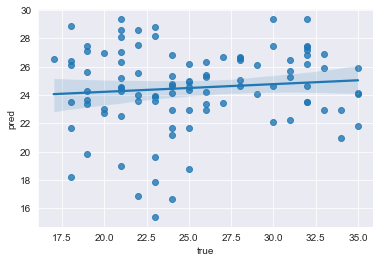

In [356]:
sns.regplot(results['true'], results['pred'])

In [357]:
df1[predictor].corr(df1[dependent])

0.5338394378831176

# Coments on: Modeling
- The chosen <b>data has low correlations</b>;
- This <b>leads to unaccurate predictions</b> since the <b>linear regression coefficient is far from 1 or -1</b>;